<a href="https://colab.research.google.com/github/vijaythapakdata/GoldPricePrediction/blob/main/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import important libraries 

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor


Data collection

In [128]:
gold_data=pd.read_csv("/content/gld_price_data.csv")

In [129]:
#print the head of the dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [130]:
#print the tail of the dataset
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [131]:
#check the index
gold_data.index

RangeIndex(start=0, stop=2290, step=1)

In [132]:
#check inforamtion about dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [133]:
#check the shape of our datasets
gold_data.shape

(2290, 6)

In [134]:
#check number of columns in our dataset
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [135]:
#check for null values
gold_data.isnull().any()

Date       False
SPX        False
GLD        False
USO        False
SLV        False
EUR/USD    False
dtype: bool

Check the correlation between all

1->Negative Correlation
2-> Positive correlation

In [136]:
correlation=gold_data.corr()

In [137]:
correlation["SPX"]

SPX        1.000000
GLD        0.049345
USO       -0.591573
SLV       -0.274055
EUR/USD   -0.672017
Name: SPX, dtype: float64

In [138]:
correlation["GLD"]

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

In [100]:
correlation['EUR/USD']

SPX       -0.672017
GLD       -0.024375
USO        0.829317
SLV        0.321631
EUR/USD    1.000000
Name: EUR/USD, dtype: float64

Draw Heatmap to check the Visualization

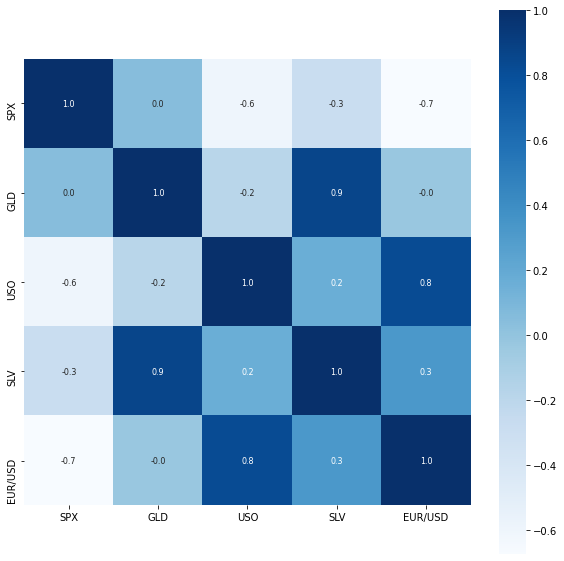

In [139]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, square=True, cbar=True, annot=True, annot_kws={"size":8}, fmt=".1f", cmap="Blues")
plt.show()

Check Some Statistics

In [140]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Check the Price distribution of gold

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


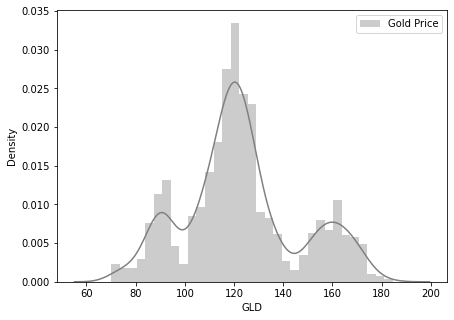

In [141]:
plt.figure(figsize=(7,5))
sns.distplot(gold_data["GLD"], color="grey",label="Gold Price")
plt.legend()
plt.show()

Seprate data 

In [142]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [143]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [144]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Train test split

In [145]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=8)

In [146]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1603, 4) (687, 4) (1603,) (687,)


Model fittieng

In [147]:
regressor=RandomForestRegressor(n_estimators=100) #n_estimator=100 it is bydefault

In [148]:
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Model Evalutaion

In [149]:
x_train_prediction=regressor.predict(x_train)
x_train_prediction

array([126.16079752, 127.20489933,  91.12670011, ..., 114.56020192,
       131.51369709, 105.83009996])

In [152]:
#R squared 
error_score=metrics.r2_score(x_train_prediction,y_train)

print("The R squared is ", error_score)

The R squared is  0.998089250658666


In [153]:
#Mean absoulte error

error_score1=metrics.mean_absolute_error(x_train_prediction,y_train)

print("The mean absolute error is", error_score1)

The mean absolute error is 0.5206701555271321


R Squared for test dat

In [154]:
x_test_prediction=regressor.predict(x_test)
x_test_prediction

array([103.57649942,  75.57550045,  88.27769894, 109.00269981,
       146.20640035, 111.01979939,  91.02399756, 137.63189989,
       170.8608984 , 114.07310075, 154.76410058,  91.05859927,
       150.74880068, 116.32919784, 121.37429997, 136.67289967,
        96.40100087, 168.79399952, 121.69900071,  94.52869862,
       118.15420044, 127.98020169, 119.95510076, 108.1559004 ,
       171.72009964, 162.44810283, 126.3071005 , 120.04430074,
       114.10060049, 114.54620104, 127.22690015,  81.1970995 ,
       156.4799023 , 101.46419969,  81.62209868,  89.50699973,
       139.68929888, 108.24189814, 129.26349854, 107.07929959,
        92.29019931,  91.16960161, 115.18429872, 108.91600077,
       168.55879729, 133.49140233, 122.40610052, 105.72749927,
        87.82939843, 156.2994032 , 125.95660078, 127.76540232,
       117.8440009 , 121.36879962, 144.05499929, 167.01659634,
        73.46760056,  85.77870032, 122.50280053, 135.10099601,
       173.41769854, 107.16869998, 111.55969925, 171.55

In [155]:
#R squared error
error_score2=metrics.r2_score(x_test_prediction,y_test)

print("The R squared for test data is", error_score2)

The R squared for test data is 0.9862868649892913


Data Visualization

In [156]:
y_test=list(y_test)

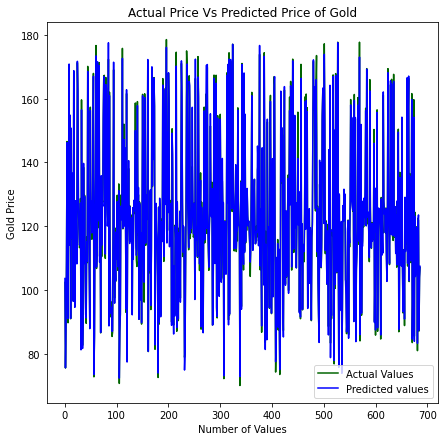

In [157]:
plt.figure(figsize=(7,7))
plt.plot(y_test,color="darkgreen", label="Actual Values")
plt.plot(x_test_prediction, color="blue", label="Predicted values")
plt.xlabel("Number of Values")
plt.ylabel("Gold Price")
plt.legend()
plt.title("Actual Price Vs Predicted Price of Gold")
plt.show()

# Training data visualization

In [158]:
y_train=list(y_train)

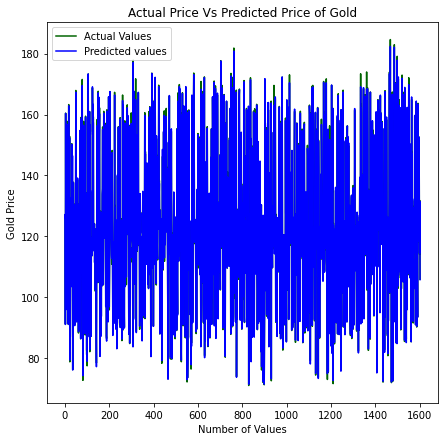

In [159]:
plt.figure(figsize=(7,7))
plt.plot(y_train,color="darkgreen", label="Actual Values")
plt.plot(x_train_prediction, color="blue", label="Predicted values")
plt.xlabel("Number of Values")
plt.ylabel("Gold Price")
plt.legend()
plt.title("Actual Price Vs Predicted Price of Gold")
plt.show()